** KNN Algorithm **

Tried using the Euclidean distance for the KNN. For N=19 the accuracy seems to be high. 

In [17]:
%matplotlib inline
%run 'TrainingData.ipynb'
%run 'DisplayHelpers.ipynb'

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [18]:
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as smp
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.cross_validation import KFold
from scipy.sparse import lil_matrix

myappdata = TrainingData()

N Fold Precision = 0.559308618436 Recall 0.485795034191
N Fold Precision = 0.563912958955 Recall 0.484514859047
N Fold Precision = 0.565444943772 Recall 0.459894459884
N Fold Precision = 0.553952506622 Recall 0.476676899715
N Fold Precision = 0.559864452654 Recall 0.467460776695
N Fold Precision = 0.587323253925 Recall 0.46385430284
N Fold Precision = 0.575441902318 Recall 0.470887350354
N Fold Precision = 0.575445592626 Recall 0.45582823285
N Fold Precision = 0.565375437919 Recall 0.468587758919
N Fold Precision = 0.58708644815 Recall 0.491515770351
Overall Precision = 0.569315611538 Recall 0.472501544485


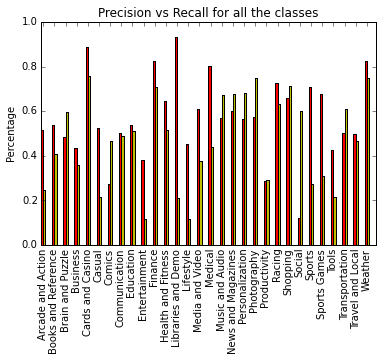

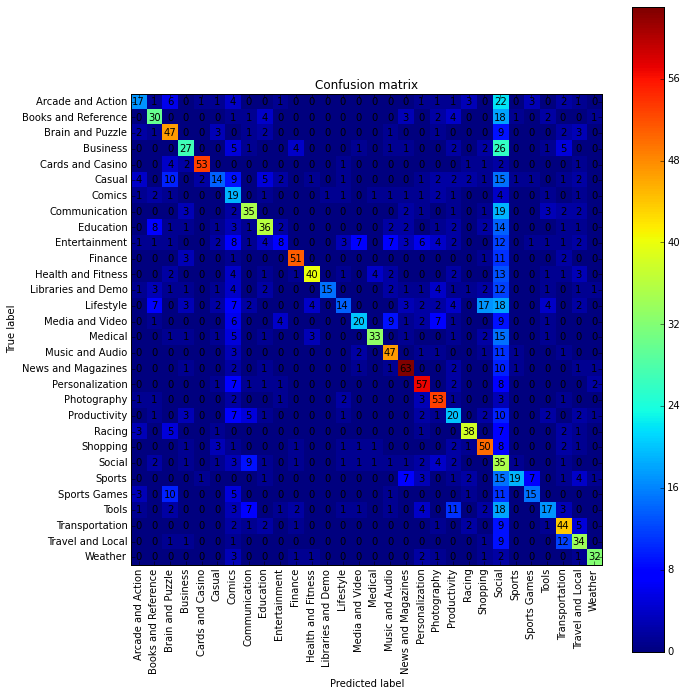

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = KNeighborsClassifier(n_neighbors=17) 
    clf.fit(train_data, train_labels)
    predict_labels_arr = clf.predict(test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall, fscore))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1} Fscore {2}".format(sum(precision)/precision.size, 
                                                                sum(recall)/recall.size,
                                                                sum(fscore)/fscore.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
average_fscore = [sum(elem)/len(elem) for elem in zip(*[x[2] for x in results])]

print("Overall Precision = {0} Recall {1} fscore {2}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall),
                                                    sum(average_fscore)/len(average_fscore)))

plot_precision_and_recall(average_precision, average_recall, average_fscore, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)



N Fold Precision = 0.593620893078 Recall 0.426956989705 Fscore 0.435699699581
N Fold Precision = 0.591664530008 Recall 0.425822023879 Fscore 0.425515031507
N Fold Precision = 0.617146497691 Recall 0.409348688159 Fscore 0.418495623382
N Fold Precision = 0.60430700788 Recall 0.413893197919 Fscore 0.422390689944
N Fold Precision = 0.618592043825 Recall 0.412621283025 Fscore 0.418287441581
N Fold Precision = 0.602049060433 Recall 0.415245824425 Fscore 0.422085701734
N Fold Precision = 0.610750358996 Recall 0.418663311599 Fscore 0.427241651138
N Fold Precision = 0.60663998737 Recall 0.381625423465 Fscore 0.397290652506
N Fold Precision = 0.59846988894 Recall 0.419353610026 Fscore 0.435303734079
N Fold Precision = 0.647785786575 Recall 0.429750746767 Fscore 0.436238785667
Overall Precision = 0.60910260548 Recall 0.415328109897 fscore 0.423854901112


/home/chaos/.pyvirtenvs/dm/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


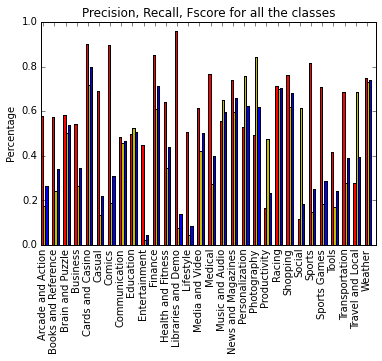

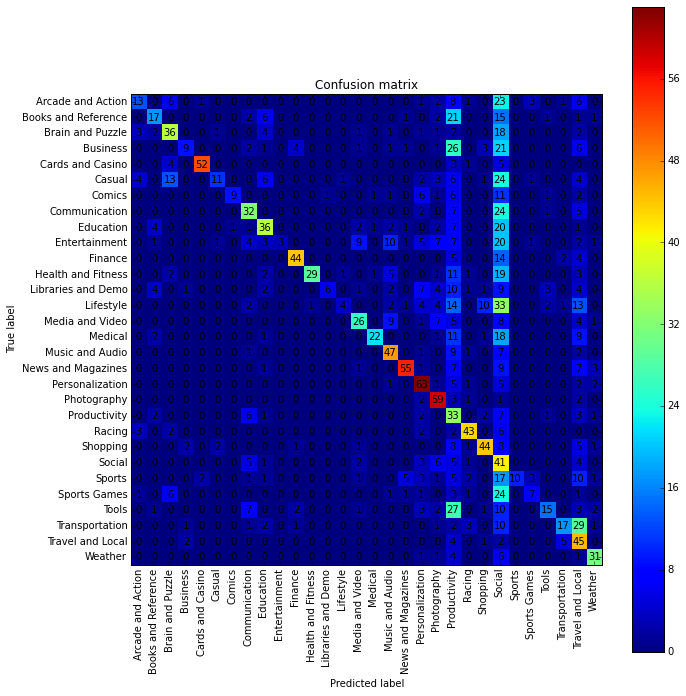

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = KNeighborsClassifier(n_neighbors=100) 
    clf.fit(train_data, train_labels)
    predict_labels_arr = clf.predict(test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall, fscore))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1} Fscore {2}".format(sum(precision)/precision.size, 
                                                                sum(recall)/recall.size,
                                                                sum(fscore)/fscore.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
average_fscore = [sum(elem)/len(elem) for elem in zip(*[x[2] for x in results])]

print("Overall Precision = {0} Recall {1} fscore {2}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall),
                                                    sum(average_fscore)/len(average_fscore)))

plot_precision_and_recall(average_precision, average_recall, average_fscore, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)


N Fold Precision = 0.563165889535 Recall 0.4029969166
N Fold Precision = 0.539419001741 Recall 0.387686667511
N Fold Precision = 0.587443318246 Recall 0.415987006769
N Fold Precision = 0.561731520886 Recall 0.422833543227
N Fold Precision = 0.555508625318 Recall 0.406239875111
N Fold Precision = 0.556508356005 Recall 0.401335287993
N Fold Precision = 0.567601837493 Recall 0.40793636255
N Fold Precision = 0.560513324385 Recall 0.403326154626
N Fold Precision = 0.565508832733 Recall 0.411635054765
N Fold Precision = 0.577515997679 Recall 0.420400772623
Overall Precision = 0.563491670402 Recall 0.408037764177


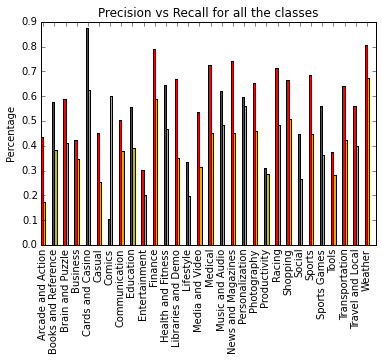

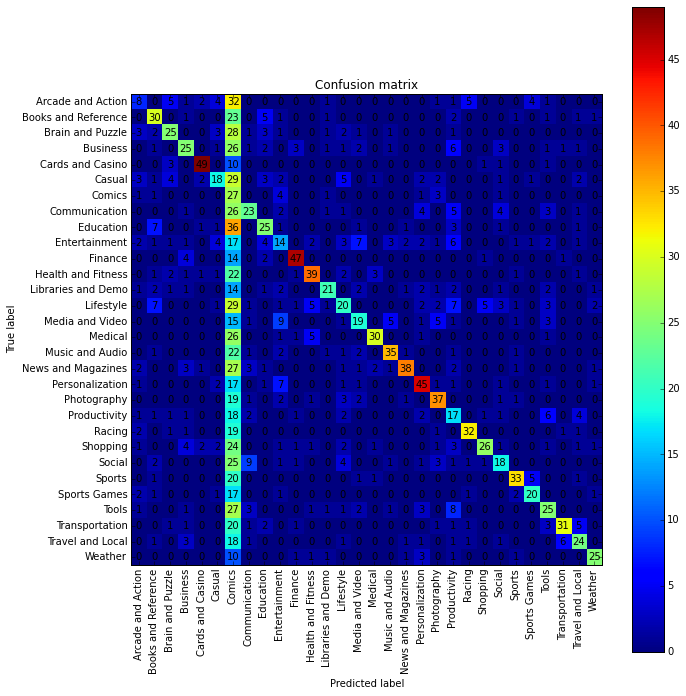

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = KNeighborsClassifier(n_neighbors=1) 
    clf.fit(train_data, train_labels)
    predict_labels_arr = clf.predict(test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1}".format(sum(precision)/precision.size, sum(recall)/recall.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
print("Overall Precision = {0} Recall {1}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall)))
plot_precision_and_recall(average_precision, average_recall, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)


N Fold Precision = 0.566871830289 Recall 0.558210452128 Fscore 0.554374413859
N Fold Precision = 0.561844250936 Recall 0.542973329267 Fscore 0.538845028412
N Fold Precision = 0.559556429654 Recall 0.54730728662 Fscore 0.543625408786
N Fold Precision = 0.583787573818 Recall 0.562856074948 Fscore 0.559732173332
N Fold Precision = 0.559410404508 Recall 0.546341772419 Fscore 0.542170498591
N Fold Precision = 0.580312564632 Recall 0.566454717079 Fscore 0.56295498924
N Fold Precision = 0.594854398252 Recall 0.573171129221 Fscore 0.571988096626
N Fold Precision = 0.573102319288 Recall 0.552282186931 Fscore 0.551138727641
N Fold Precision = 0.586825426251 Recall 0.573997075301 Fscore 0.567574637745
N Fold Precision = 0.567268274074 Recall 0.55905327899 Fscore 0.55136394649
Overall Precision = 0.57338334717 Recall 0.55826473029 fscore 0.554376792072


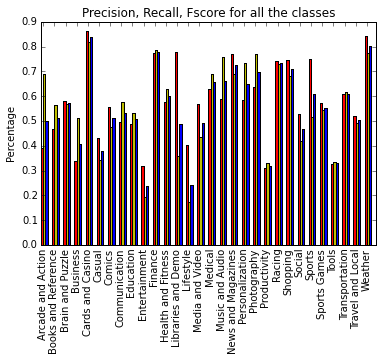

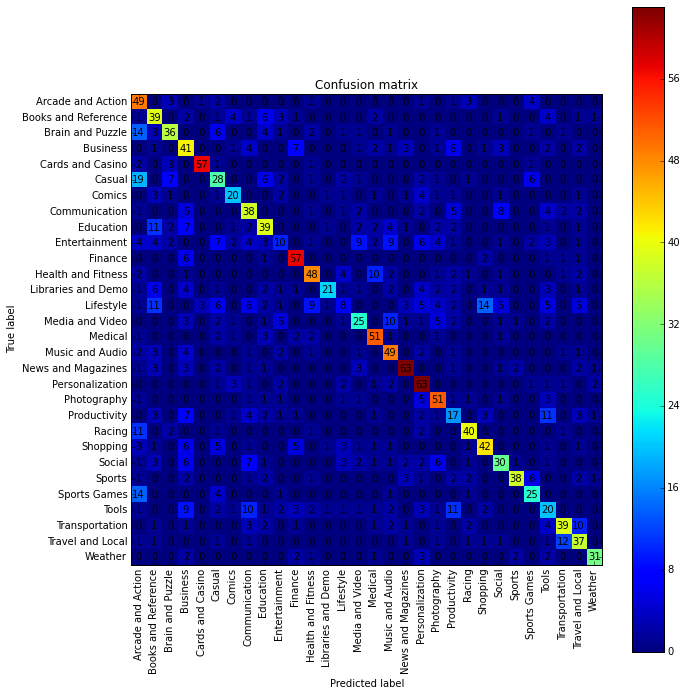

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import TruncatedSVD

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)
    svd = TruncatedSVD(n_components=200, random_state=42)
    reduced_train_data = svd.fit_transform(train_data)
    clf = KNeighborsClassifier(n_neighbors=14) 
    clf.fit(reduced_train_data, train_labels)
    reduced_test_data = svd.transform(test_data)
    predict_labels_arr = clf.predict(reduced_test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    
    results.append((precision, recall, fscore))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1} Fscore {2}".format(sum(precision)/precision.size, 
                                                                sum(recall)/recall.size,
                                                                sum(fscore)/fscore.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
average_fscore = [sum(elem)/len(elem) for elem in zip(*[x[2] for x in results])]

print("Overall Precision = {0} Recall {1} fscore {2}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall),
                                                    sum(average_fscore)/len(average_fscore)))

plot_precision_and_recall(average_precision, average_recall, average_fscore, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)



N Fold Precision = 0.63302071399 Recall 0.573854057801 Fscore 0.587844436757
N Fold Precision = 0.607288333128 Recall 0.55640921465 Fscore 0.570653547171
N Fold Precision = 0.627095757142 Recall 0.572169072639 Fscore 0.583478717802
N Fold Precision = 0.623905862674 Recall 0.567551836776 Fscore 0.582341120747
N Fold Precision = 0.609372793328 Recall 0.556823245811 Fscore 0.571421504193
N Fold Precision = 0.638601547497 Recall 0.582960913189 Fscore 0.594929357421
N Fold Precision = 0.634399465352 Recall 0.578961722534 Fscore 0.593480748643
N Fold Precision = 0.630845174858 Recall 0.573680210063 Fscore 0.585898267627
N Fold Precision = 0.631103006028 Recall 0.586134044134 Fscore 0.596478145351
N Fold Precision = 0.62650047954 Recall 0.583191131278 Fscore 0.595034553239
Overall Precision = 0.626213313354 Recall 0.573173544888 fscore 0.586156039895


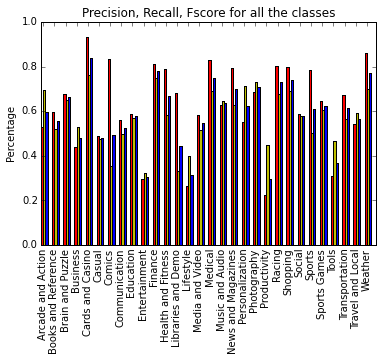

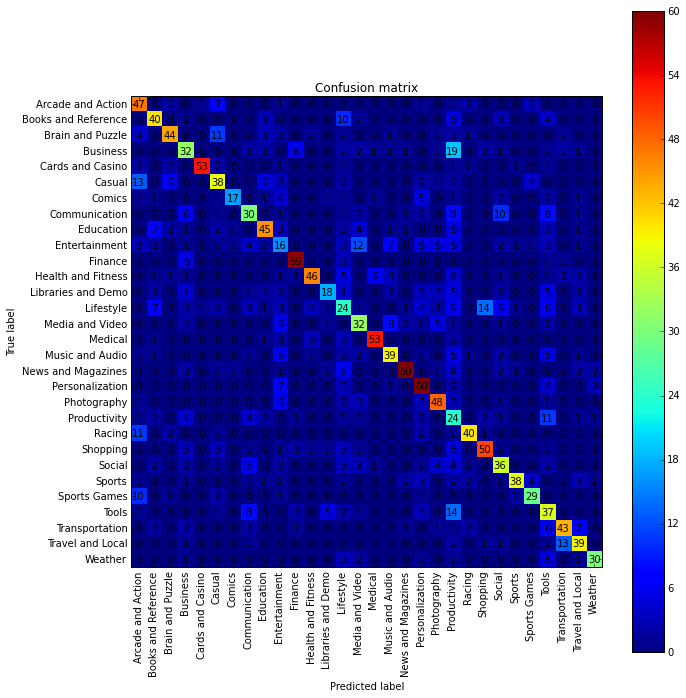

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.neighbors.nearest_centroid import NearestCentroid

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = NearestCentroid()
    clf.fit(train_data, train_labels)
    predict_labels_arr = clf.predict(test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall, fscore))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1} Fscore {2}".format(sum(precision)/precision.size, 
                                                                sum(recall)/recall.size,
                                                                sum(fscore)/fscore.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
average_fscore = [sum(elem)/len(elem) for elem in zip(*[x[2] for x in results])]

print("Overall Precision = {0} Recall {1} fscore {2}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall),
                                                    sum(average_fscore)/len(average_fscore)))

plot_precision_and_recall(average_precision, average_recall, average_fscore, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)

    
